In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")



In [2]:
stock_data=yf.download('AAPL', start='2024-01-01')
stock_data.head(5)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,187.149994,188.440002,183.889999,185.639999,184.734970,82488700
2024-01-03,184.220001,185.880005,183.429993,184.250000,183.351746,58414500
2024-01-04,182.149994,183.089996,180.880005,181.910004,181.023163,71983600
2024-01-05,181.990005,182.759995,180.169998,181.179993,180.296722,62303300
2024-01-08,182.089996,185.600006,181.500000,185.559998,184.655365,59144500


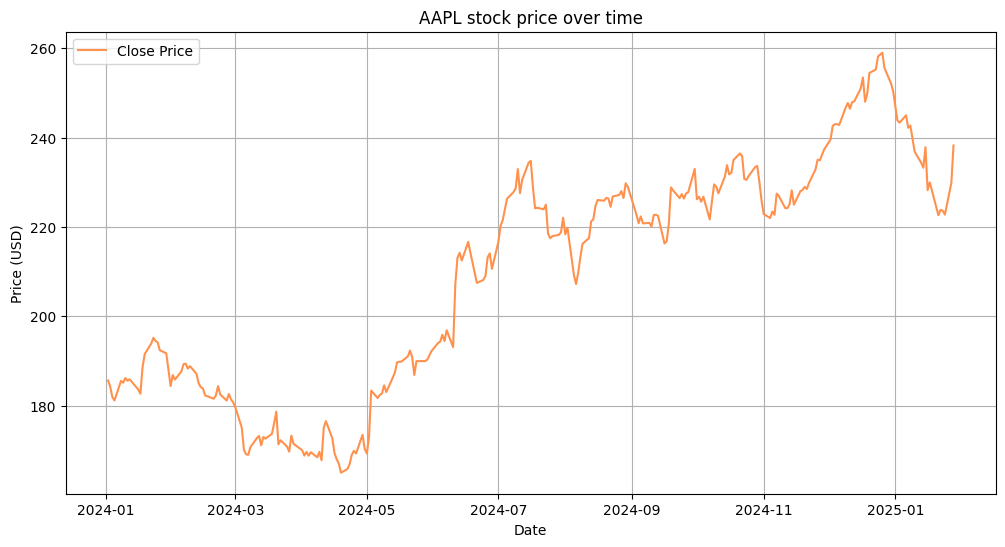

In [3]:
plt.figure(figsize=(12,6))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color='#FF914D')
plt.title('AAPL stock price over time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Calssical Time Series Decomposition
## Introduction
**Time series decomposition is a technique used to break down a time series into its fundamental components:**

- Trend: The long-term movement in the data.
- Seasonality: Repeating patterns within a fixed period.
- Residual (Noise): The remaining component after removing trend and seasonality.  
This decomposition helps in understanding the underlying patterns in data, making it useful for forecasting and analysis.

**There are two main types of decomposition:**
1. Additive
2. Multiplicative.

## Additive Decomposition:
### Formula:
Y(t)= trend + sesonality+decomposition


- Assumes that trend, seasonality, and residuals are independent and add together to form the observed time series.
- Suitable when seasonal variations remain constant in absolute magnitude over time.
### Example:
Imagine a stock price that fluctuates seasonally by around ₹10 regardless of whether the price is ₹100 or ₹500. This is an additive pattern.

### Visualization:
If plotted, an additive series will show seasonality with a fixed range across different levels of the trend.

## Multiplicative Decomposition
### Formula:
Y(t)= trend * sesonality*decomposition

- Assumes that seasonality and residuals scale with the trend instead of being independent.
- Suitable when seasonal variations are proportional to the trend level (e.g., larger trends lead to larger seasonal effects).
### Example:
Consider a stock where seasonal fluctuations are 10% of the price. If the stock is ₹100, the fluctuation is ₹10, but if it’s ₹500, the fluctuation is ₹50. This follows a multiplicative pattern.

### Visualization:
In a multiplicative time series, the seasonal variations increase or decrease in proportion to the trend.


In [4]:
# Import Necessary Libraries
#seasonal_decompose is used to perform the decomposition.
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition_additive= seasonal_decompose(stock_data['Close'], model='additive', period=30) # Perform Time Series Decomposition
#period=30: Specifies that seasonality repeats every 30 time steps.


In [6]:
#Extracts trend, seasonality, and residuals from the decomposition.
trend_additive = decomposition_additive.trend
seasonal_additive = decomposition_additive.seasonal
residual_additive = decomposition_additive.resid

- Figure Layout: Uses plt.subplot to arrange four plots vertically.
- Color Scheme: Uses #FF914D for better visualization.
- Legend Positioning: loc='upper left' ensures clear labeling.
- Final Layout: plt.tight_layout() prevents overlap.


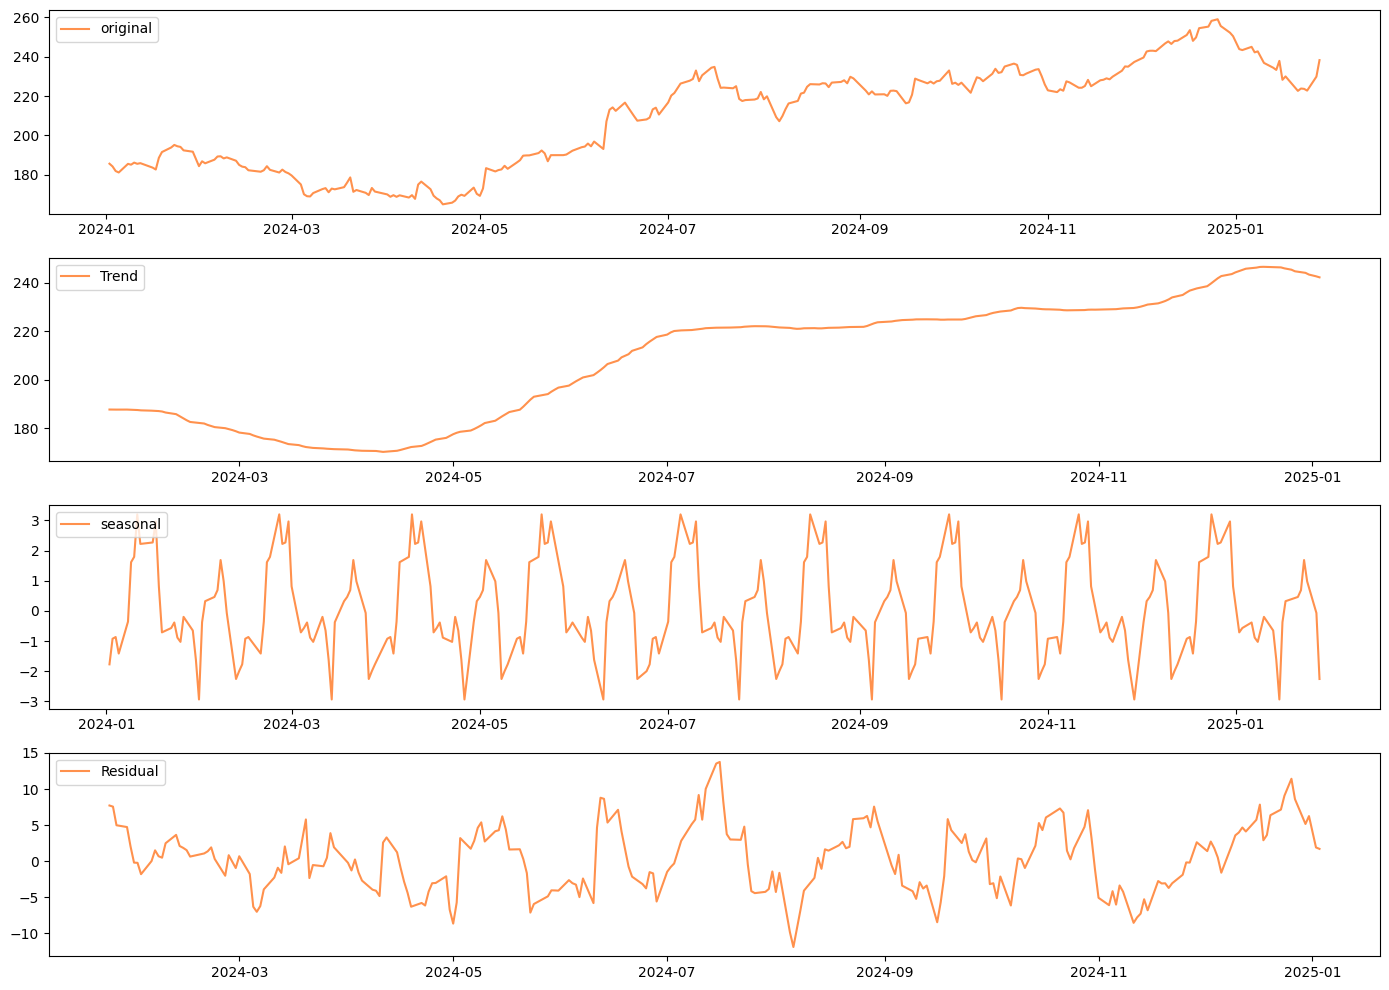

In [8]:
# Plot the Components
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(stock_data['Close'], label='original', color='#FF914D')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend_additive, label='Trend', color='#FF914D')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal_additive, label='seasonal', color='#FF914D')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual_additive, label='Residual', color='#FF914D')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Conclusion
- Classical time series decomposition helps in breaking down a time series into meaningful components.
- The trend shows the overall direction, seasonality captures repetitive patterns, and residual represents noise.
- This method is useful in understanding the structure of a dataset before applying predictive models.


# STL Decomposition (Seasonal-Trend Decomposition using LOESS)
STL decomposition is an advanced technique used to break down a time series into its components:

- Trend – The long-term movement in the data.
- Seasonality – Repeating patterns (e.g., daily, weekly, yearly).
- Residual – The leftover variation after removing trend and seasonality.
  
**Unlike classical decomposition, STL is more flexible because:**

- It allows for changing seasonality over time.
- It is robust to outliers, making it better suited for real-world data.


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL


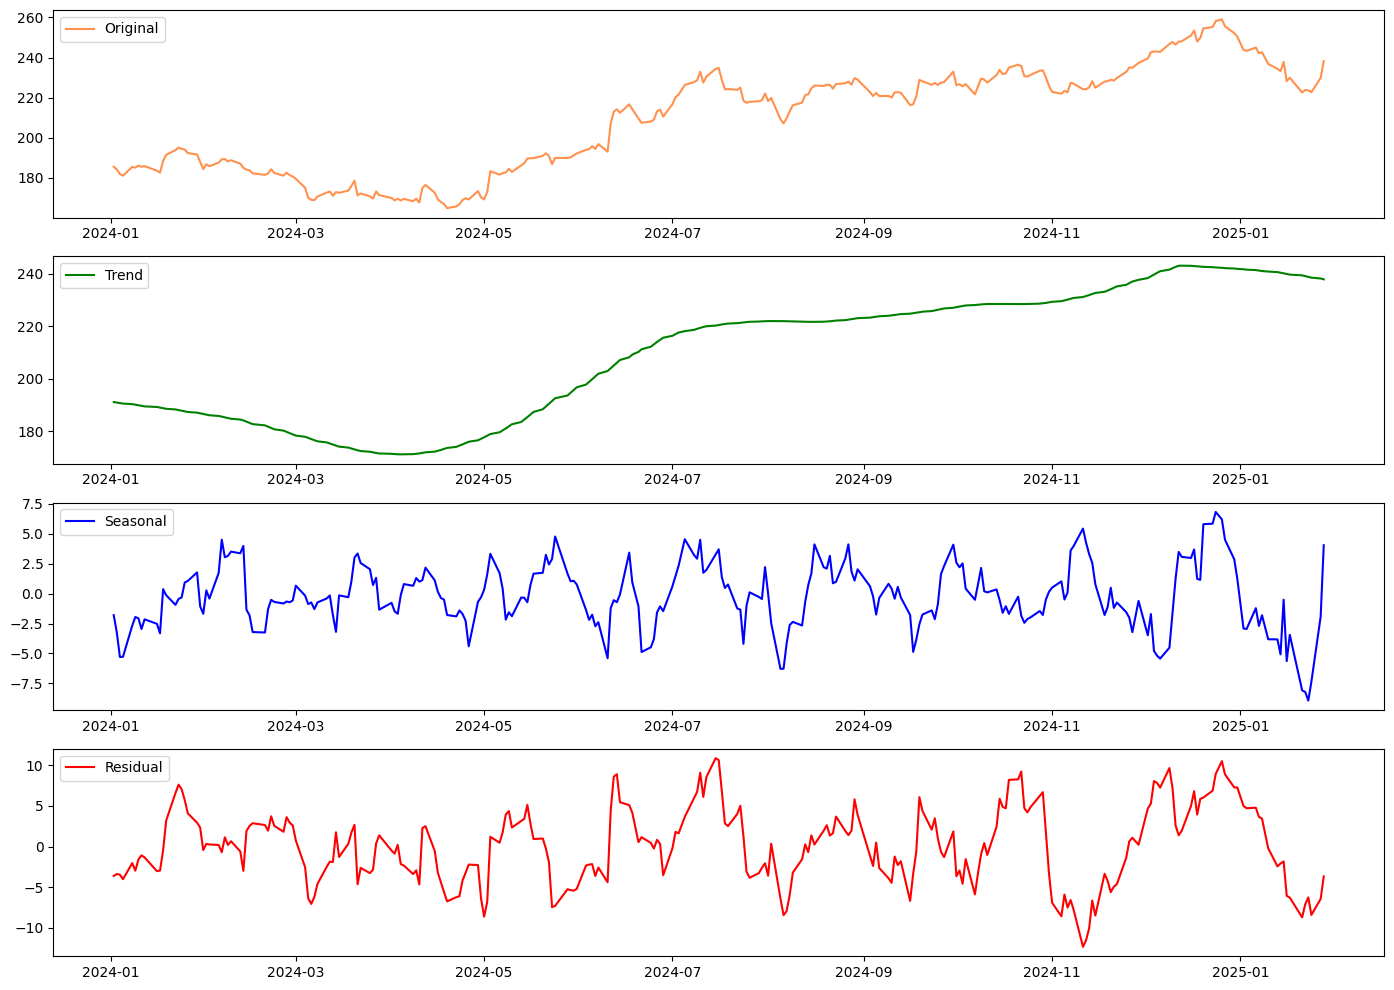

In [13]:
# Apply STL decomposition with a specific period (e.g., 30 days for monthly seasonality)
stl = STL(stock_data['Close'], period=30)  # Replace 30 with the correct period for your data
result = stl.fit()

# Extract components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Plot the decomposition results
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(stock_data['Close'], label="Original", color="#FF914D")
plt.legend(loc="upper left")

plt.subplot(412)
plt.plot(trend, label="Trend", color="green")
plt.legend(loc="upper left")

plt.subplot(413)
plt.plot(seasonal, label="Seasonal", color="blue")
plt.legend(loc="upper left")

plt.subplot(414)
plt.plot(residual, label="Residual", color="red")
plt.legend(loc="upper left")

plt.tight_layout()
plt.show()
